#Crop Yeild Prediction

##Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Data pre-processing

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
#Types of crops present
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
# axis parameter specifies whether to drop a column(1) or a row(0)
#inplace=True: This parameter tells pandas to modify the original DataFrame in place,
# meaning the change is applied directly to df without creating a new DataFrame.

In [6]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.shape

(28242, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [10]:
df.duplicated().sum()

2310

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In the column 'average_rain_fall_mm_per_year', not all the values are float some of them are numeric string. So first we'll filter out all the numeric strings and then drop that from dataframe

In [13]:
def isStrNum(obj):
    try:
        float(obj)
        return False
    except:
        return True

For_dropping = df[df['average_rain_fall_mm_per_year'].apply(isStrNum)].index

In [14]:
df = df.drop(For_dropping)

In [15]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [16]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

##Graphical Representation

In [17]:
len(df['Area'].unique())#total 101 countries are given in dataset

101

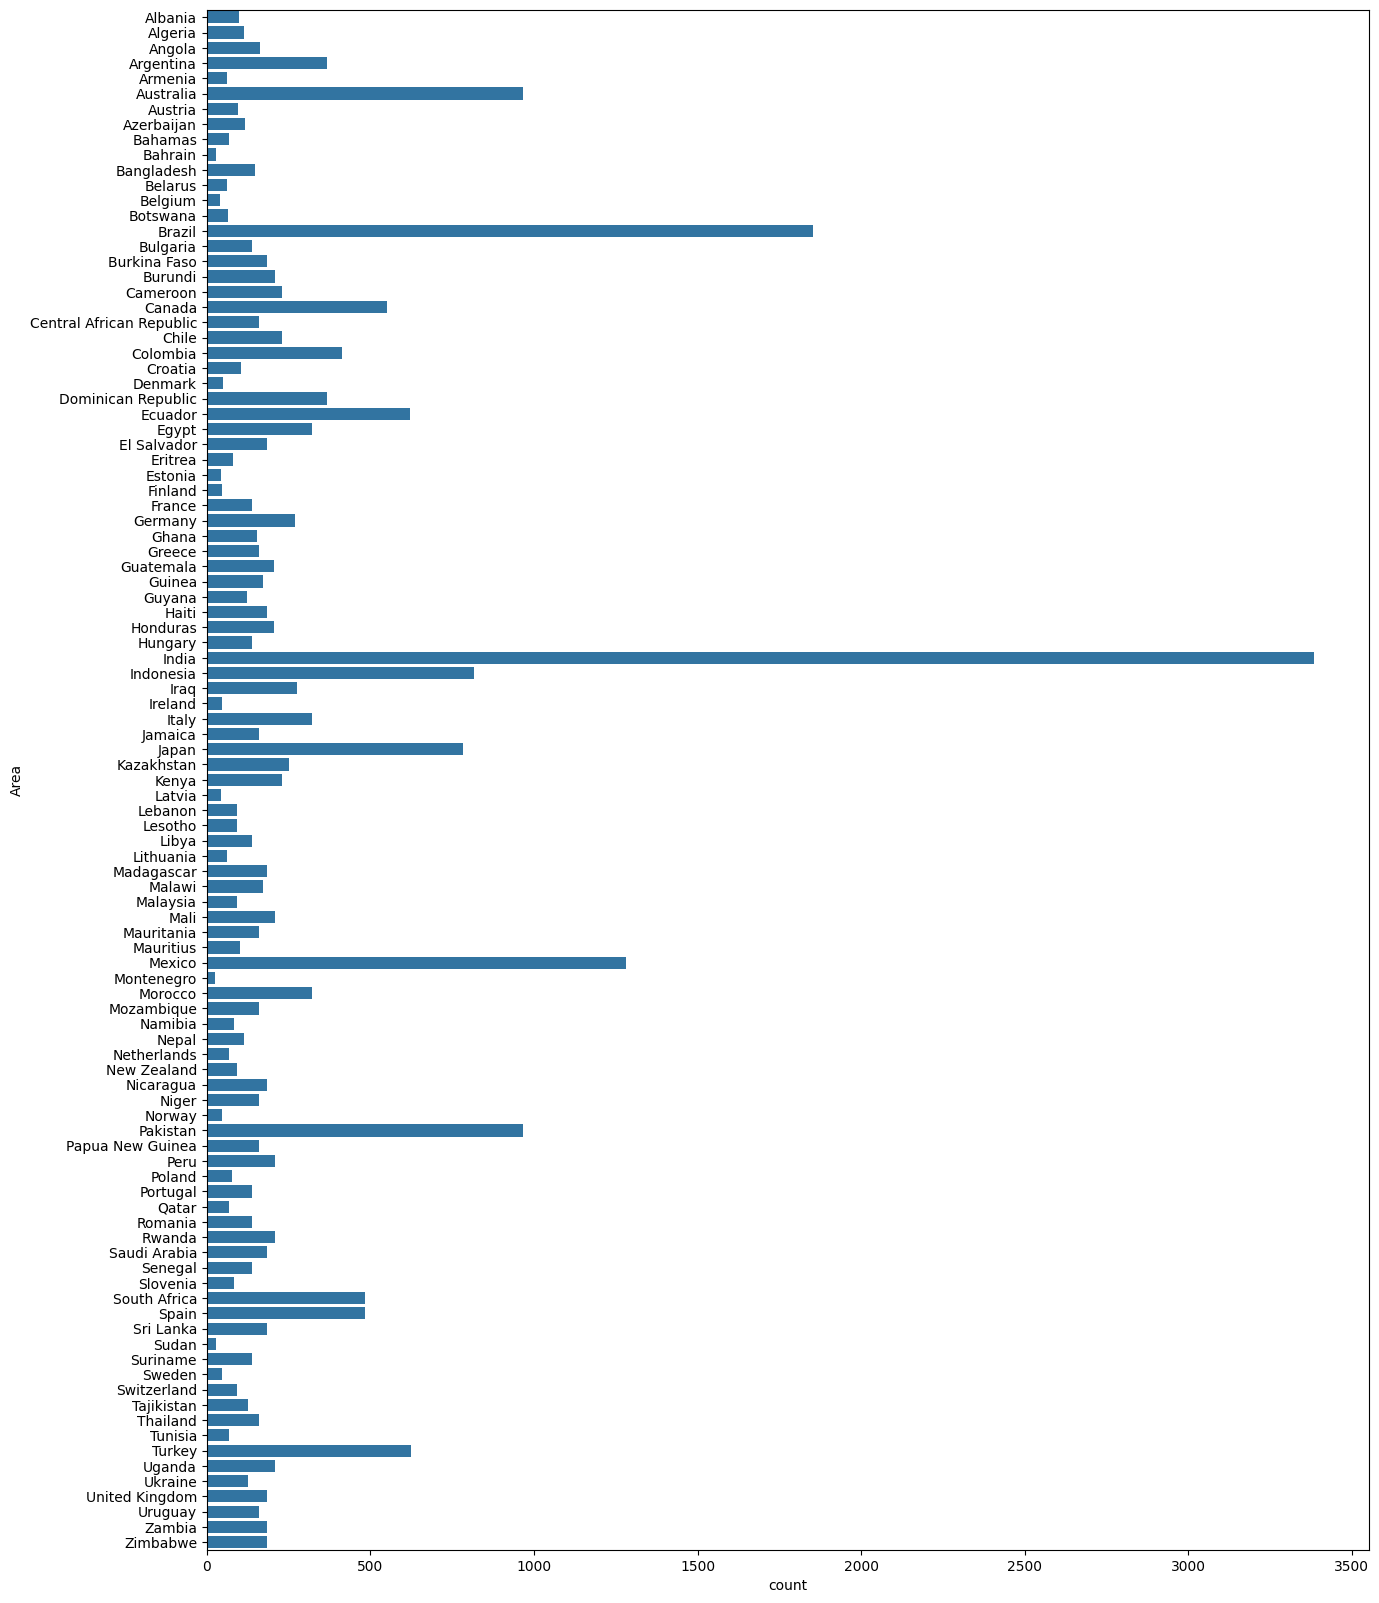

In [19]:
#Frequency vs Area
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

From this graph we can see that India has the most yield of crops area wise out of all countries

In [23]:
pd.crosstab(df['Area'], df['Item'])

Item,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
Area,,,,,,,,,,
Albania,0,23,0,23,4,3,23,0,23,0
Algeria,0,23,0,23,23,22,0,0,23,0
Angola,23,23,0,23,23,13,13,23,23,0
Argentina,46,46,0,46,46,46,46,46,46,0
Armenia,0,21,0,21,0,0,0,0,21,0
...,...,...,...,...,...,...,...,...,...,...
Ukraine,0,21,0,21,21,21,21,0,21,0
United Kingdom,0,0,0,92,0,0,0,0,92,0
Uruguay,0,23,0,23,23,23,23,23,23,0


<Axes: xlabel='count', ylabel='Item'>

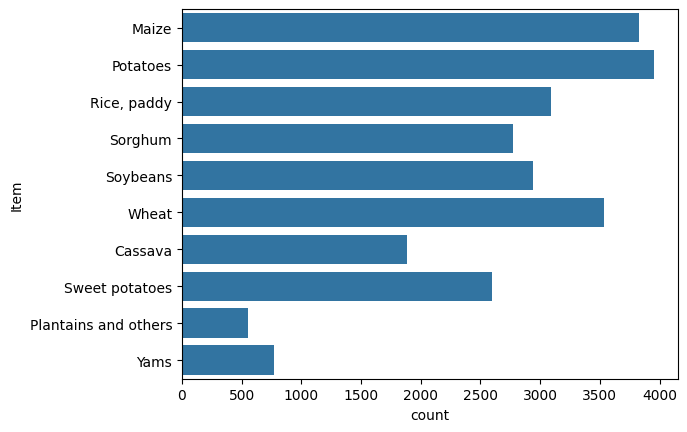

In [ ]:
#Graph of Frequency vs Item
sns.countplot(y=df['Item'])

In [35]:
#Yield Vs Item
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

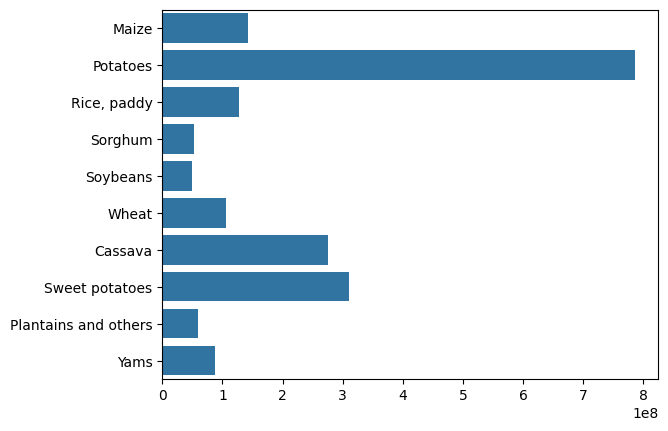

In [36]:
sns.barplot(y=crops,x=yield_per_crop)

In [38]:
country = df['Area'].unique()
rainfall_per_country = []
for state in country:
    rainfall_per_country.append(df[df['Area']==state]['average_rain_fall_mm_per_year'].sum())

<Axes: >

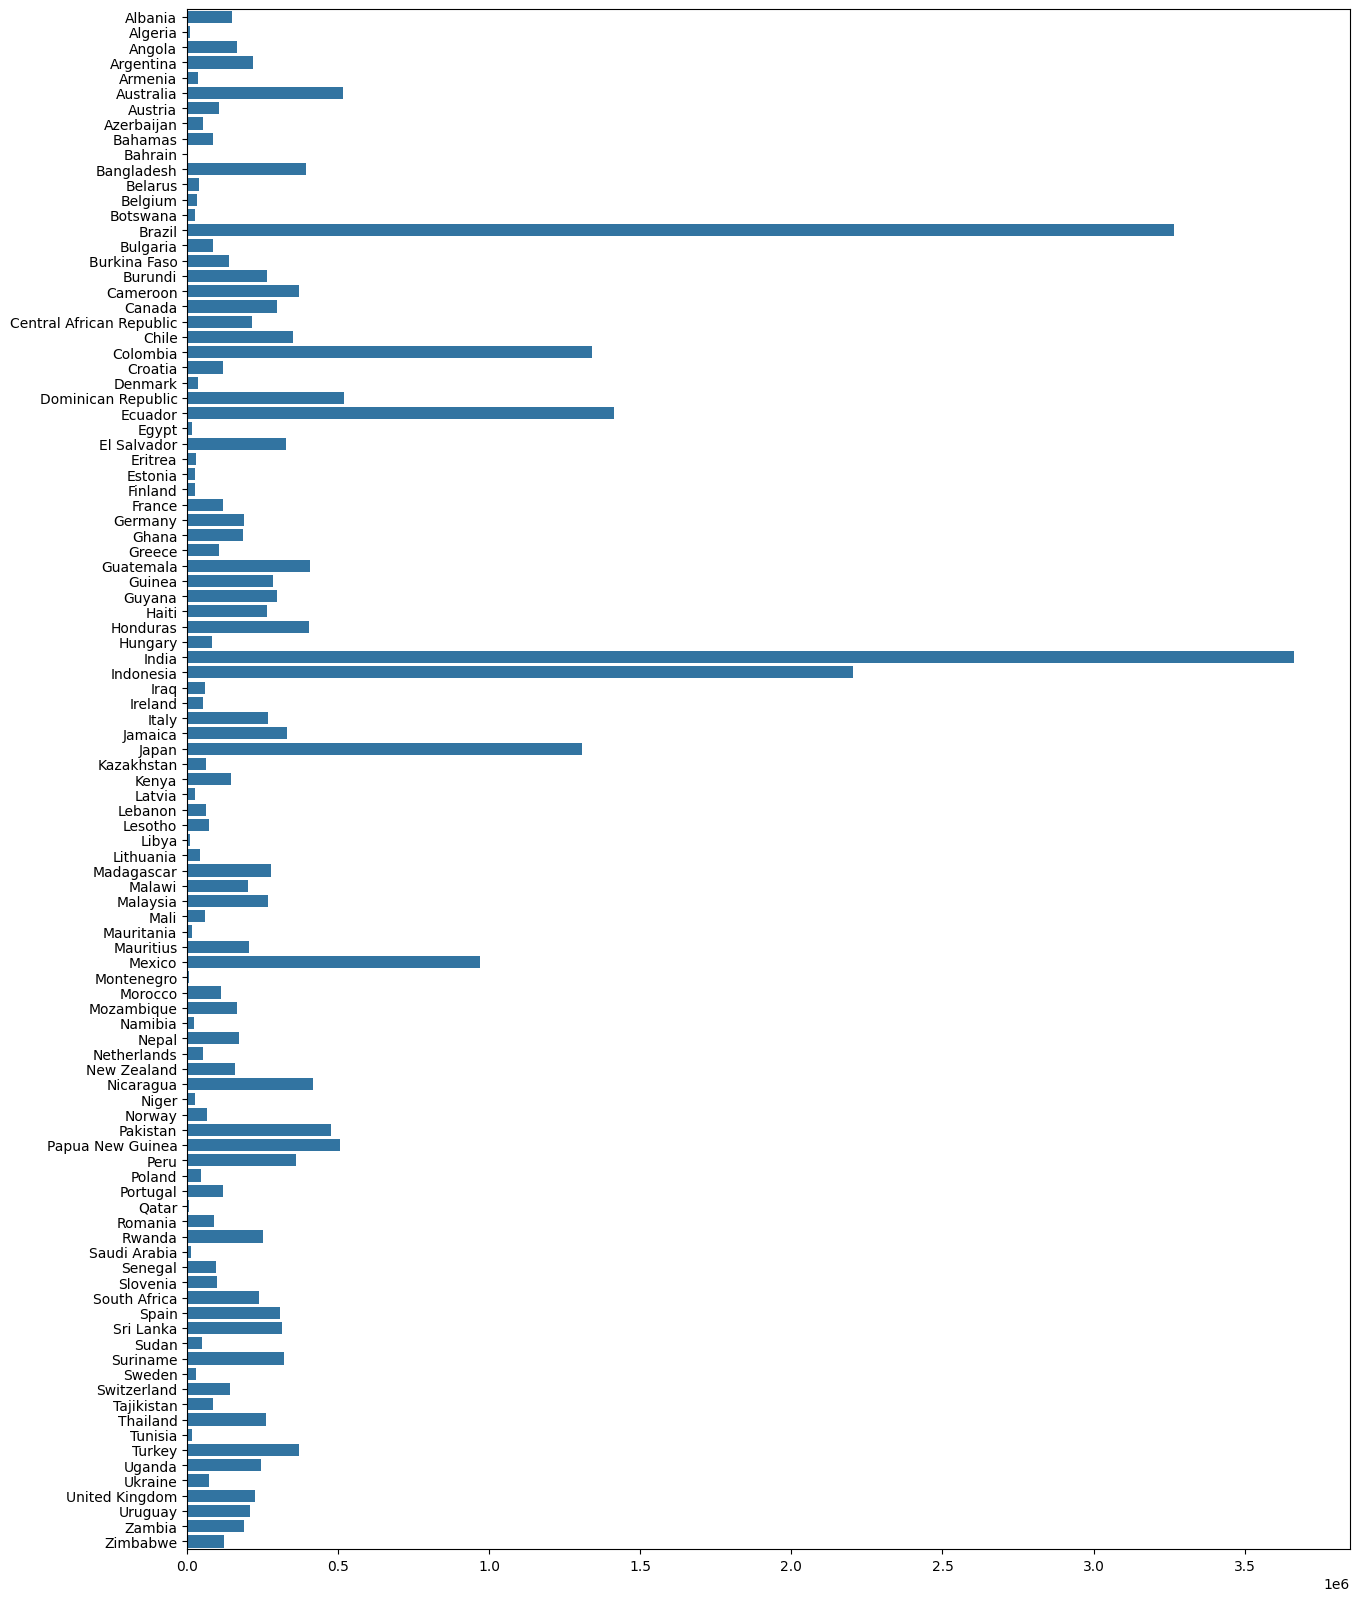

In [41]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country,x=rainfall_per_country)

###Average rainfall in India is higher than other countries

In [42]:
country = df['Area'].unique()
Avg_temp_per_country = []
for state in country:
    Avg_temp_per_country.append(df[df['Area']==state]['avg_temp'].sum())

<Axes: >

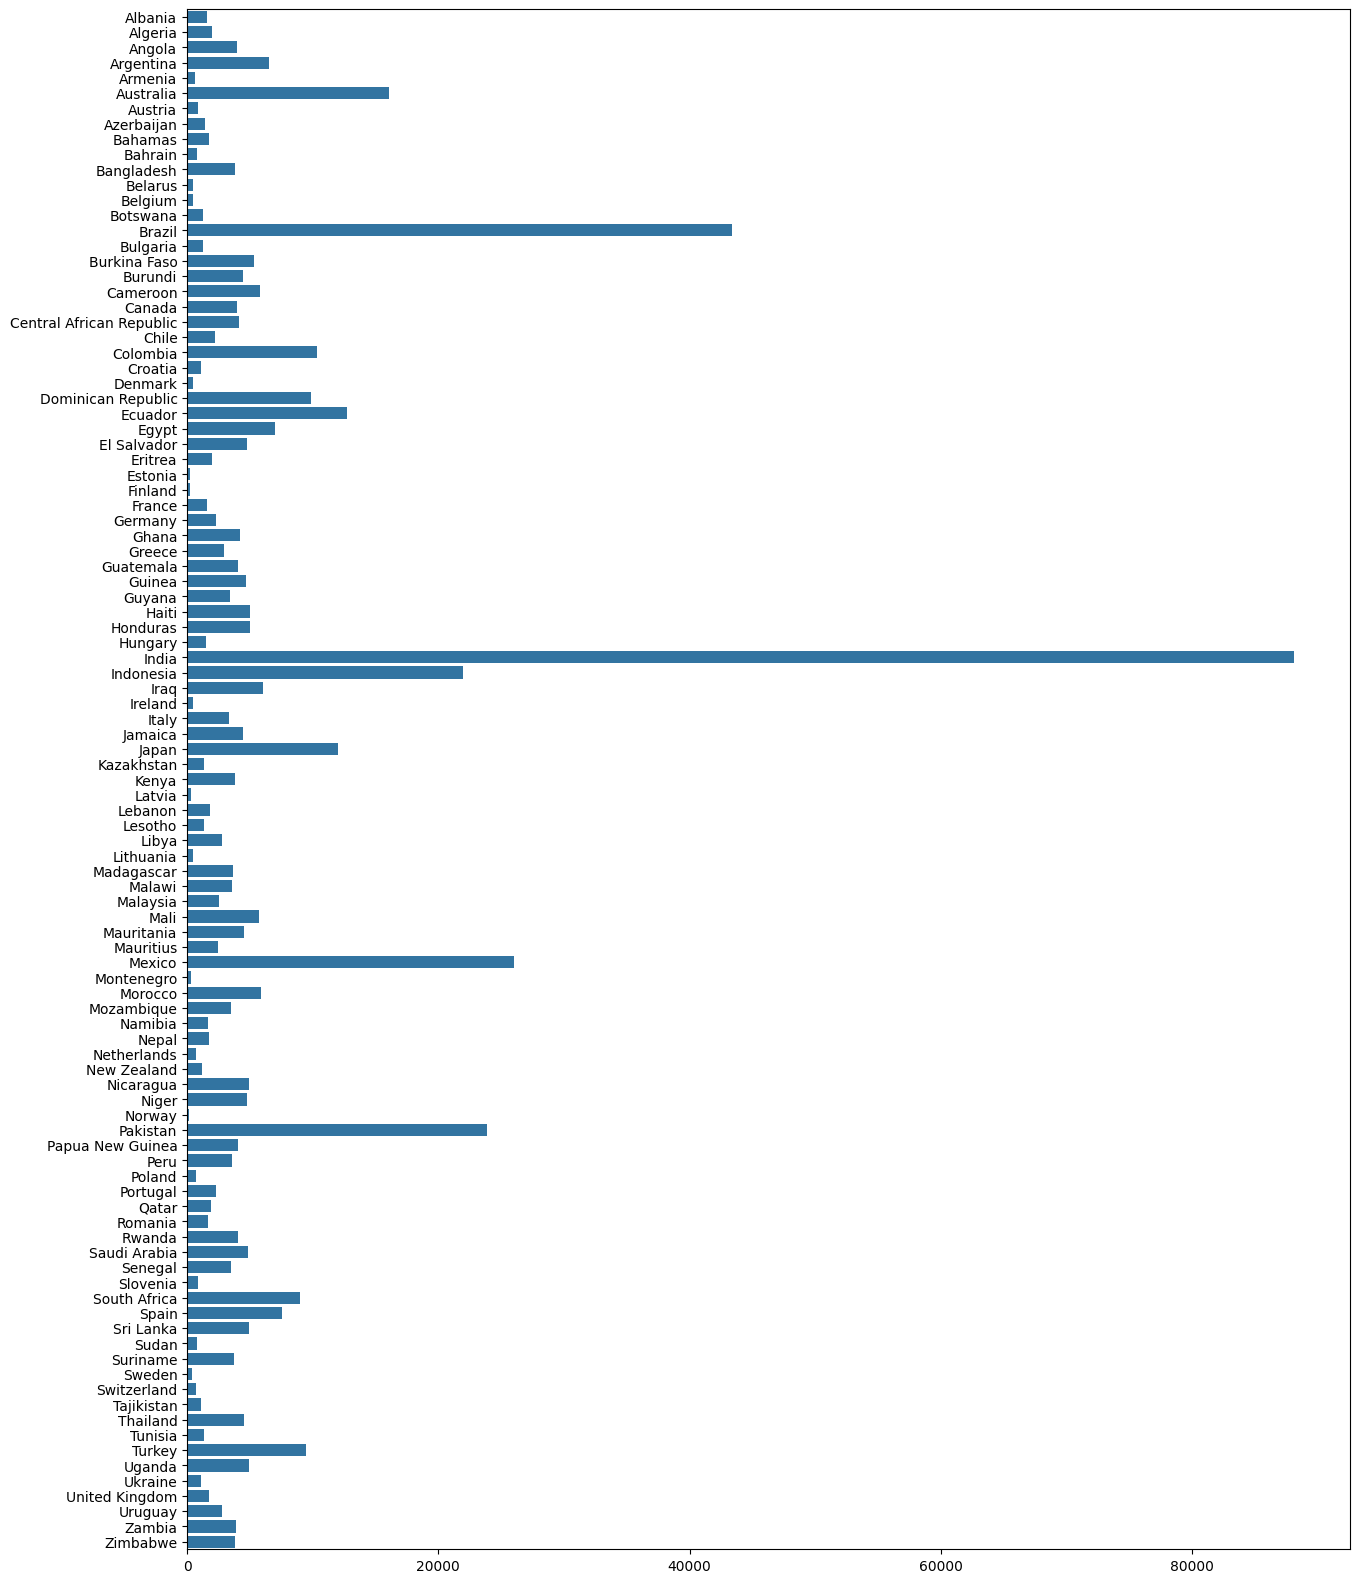

In [43]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country,x=Avg_temp_per_country)

###Average temperature od India is higher than other countries

In [48]:
country = df['Area'].unique()
pesticides_per_country = []
for state in country:
    pesticides_per_country.append(df[df['Area']==state]['pesticides_tonnes'].sum())

<Axes: >

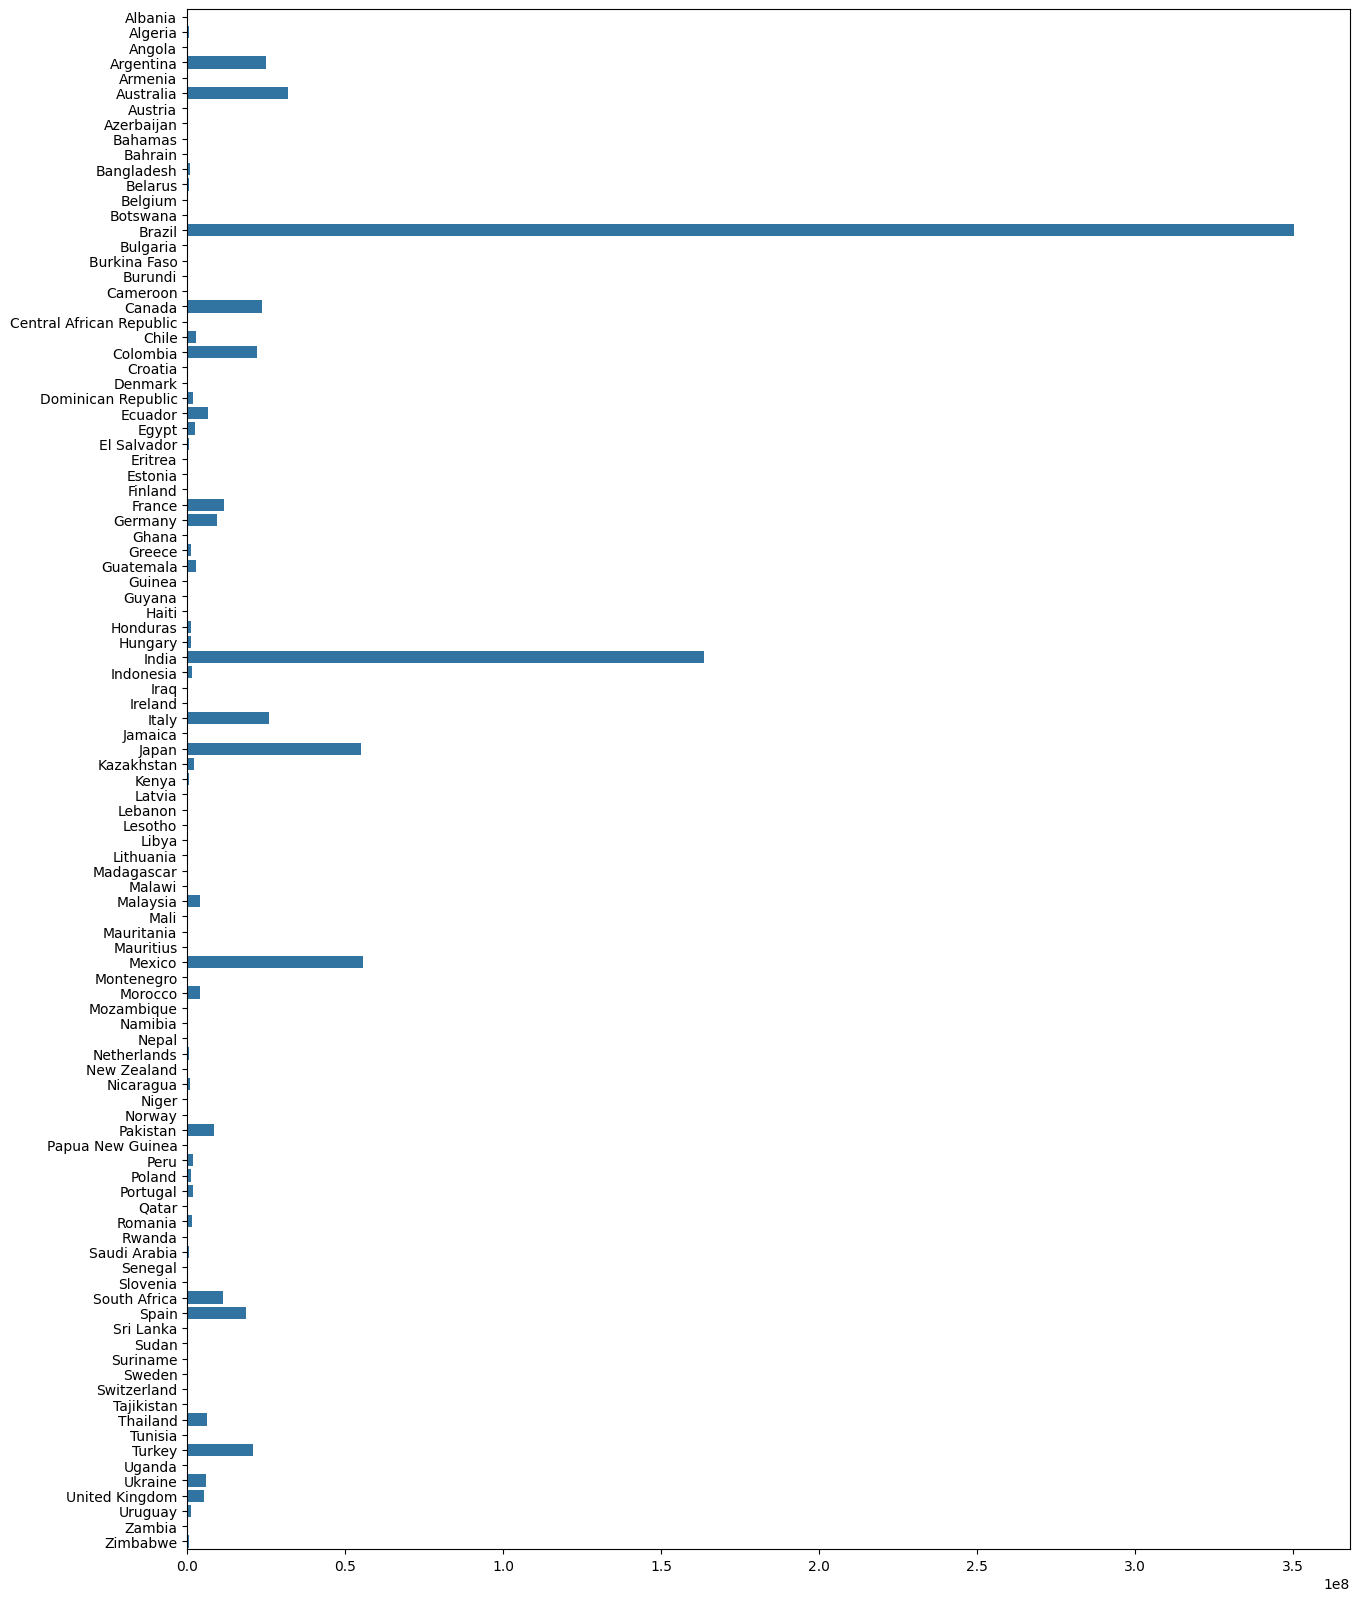

In [49]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country,x=pesticides_per_country)

###Brazil uses pesticides the most

In [44]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [45]:
df['hg/ha_yield'].sum()

1996196943

In [46]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

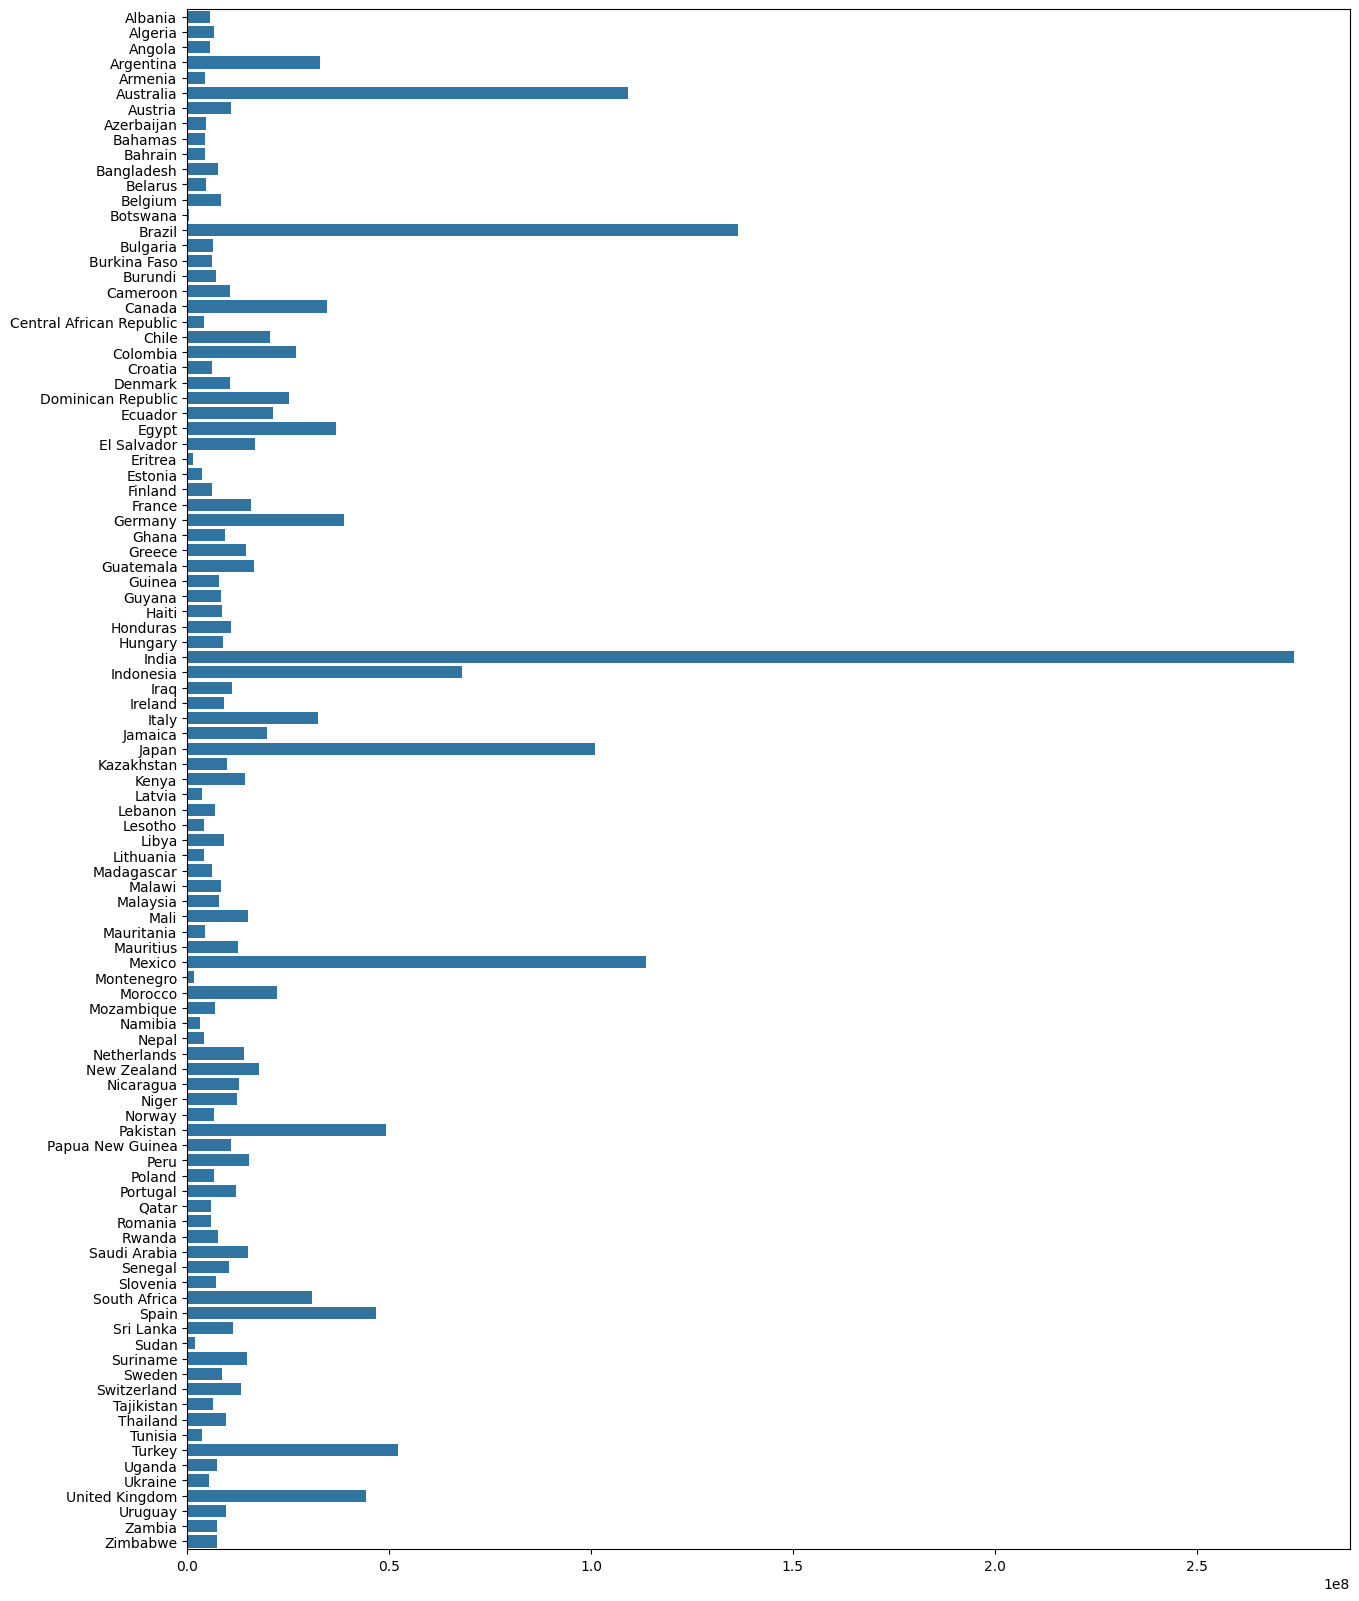

In [47]:
#Yield Per Country Graph
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

In [50]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


#Train-Test

In [51]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

In [52]:
x=df.drop('hg/ha_yield',axis=1)#input
y=df['hg/ha_yield']#output

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, shuffle=True)

In [54]:
#Converting Categorical to Numerical and Scaling the values
#scaling is done on numeric colums as machine can give preference to large values
#one hot encoder is used in some categorical colums to convert then into numeric for machine to understand
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [55]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3]),
                                ('OHE', OneHotEncoder(drop='first'), [4, 5])])

In [56]:
X_train_new = preprocesser.fit_transform(X_train)
X_test_new = preprocesser.transform(X_test)

In [57]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

In [58]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [59]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_new,y_train)
    y_pred = md.predict(X_test_new)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.497694405192 score : 0.7473129336888378


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.849263727097 score : 0.7473042729963115
Dtr : mae : 3878.9334875650666 score : 0.9802045037345423


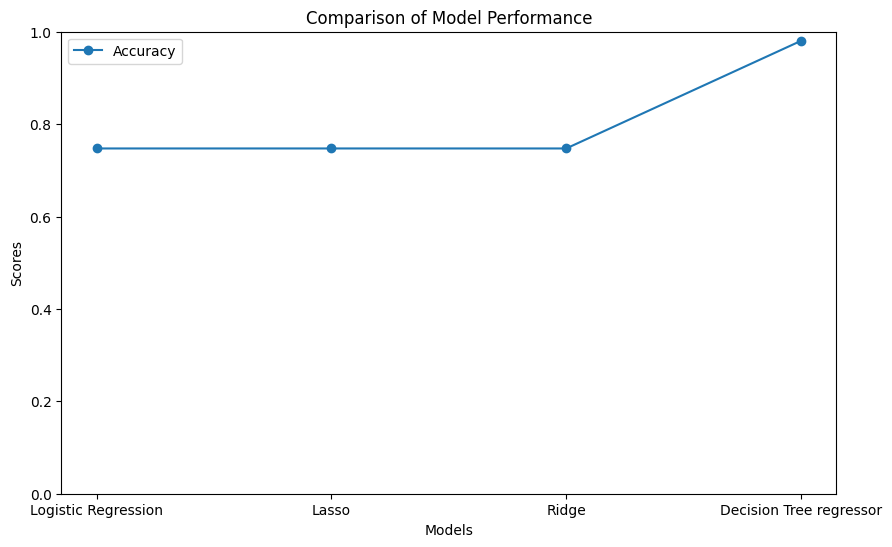

In [60]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Lasso', 'Ridge','Decision Tree regressor']
accuracies = [0.747312, 0.747326, 0.747304, 0.980309]

#line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.legend()
plt.ylim(0, 1)
plt.show()


Dcesicion tree accuracy=97%

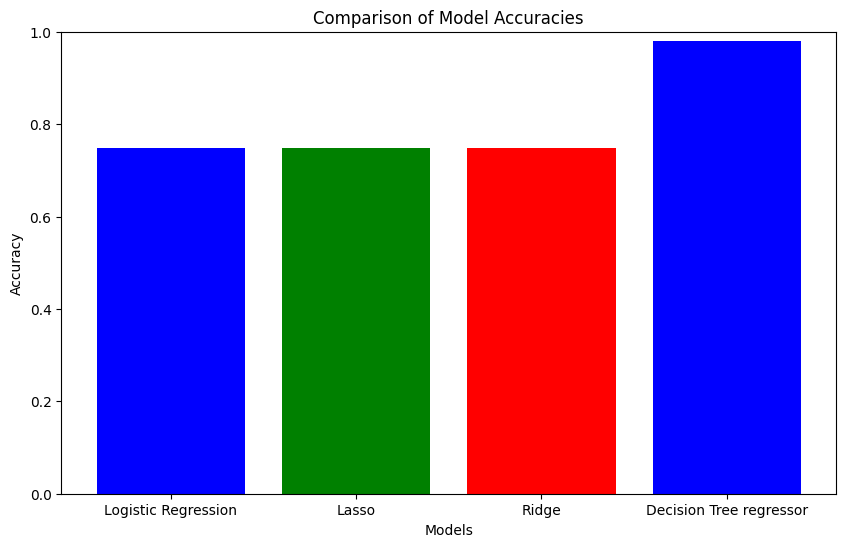

In [61]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Lasso', 'Ridge','Decision Tree regressor']
accuracies = [0.747312, 0.747326, 0.747304, 0.980309]

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()


In [62]:
#From the above algorithms we've selected decision tree as it is giving highest score
dtr = DecisionTreeRegressor()
dtr.fit(X_train_new,y_train)
dtr.predict(X_test_new)

array([35286., 22814., 19295., ..., 23359., 34879., 79048.])

#Predictive model

In [63]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [64]:
result

array([36613.])

In [65]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000
